In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynascale.challenges.ca import CAChallenge
from dynascale.utils.ca import plot
from dynascale.baselines.basic import Basic

2023-05-20 23:23:41.188729: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


  0%|          | 0/1000 [00:00<?, ?it/s]

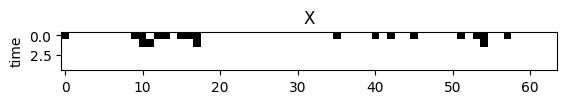

In [3]:
latent_dim = 3
embed_dim = 64
timesteps = 5
n = 1000
challenge = CAChallenge(latent_dim, embed_dim, mutation_p=0)
x0 = challenge.make_init_conds(n=n)
x = challenge.make_data(x0, timesteps=timesteps)
plot([x], labels=["X"])

In [4]:
model = Basic(embed_dim, timesteps, max_control_cost=0)
model.fit(x, epochs=100, verbose='auto')

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.0212
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 13/100
32/32 [=================

  0%|          | 0/4 [00:00<?, ?it/s]

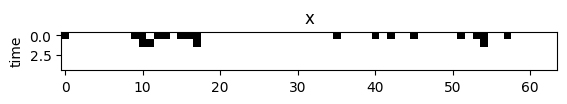

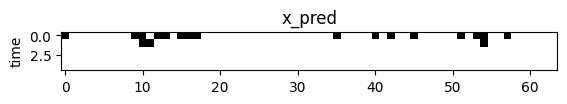

In [5]:
x_pred = model.predict(x0, timesteps=timesteps)
plot([x, x_pred], labels=["x", "x_pred"])

In [6]:
challenge.calc_loss(x_pred, x)

0.989759375